# Project for intra and inter similarity

### Importing libs

In [40]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import pairwise2 #Does pairwise alignments
from Bio.pairwise2 import format_alignment #formats the alignments into a nice printable version
from scipy import stats

# Main N2

In [26]:
# Try from consensus
horseH1 = "CGATTCAAACGGAGAAGCACAAGGAACAACAATACCTGTGGGGGCTTGTTCCTCAGTGGGAGGAGCTCTGTCTGCACAGAGTTCAGGGACAAGGGCAGGGGACACATATCCTAAAACAAGGATTAGAACTTGGGCACTCAGCATCCCACTGAGCATAGTCACTGTGGCATCAATCACCTTCTTCCTCAGGTTGAGCCAAGTCTCGACTATGAAATATTCTGCCTCATGAATATGCAAATGAGATGAGGTGTACTAAGTTAAATATGGATATGTCTGTGCCCTGAGAGCATCACCCAACAACCACCCCCTCCCACACAGAAAAACCCTGAGAGCACAGCCCCTCACC"
horseH2 = "TCCTAGCCTTGATTCTATCCATACCAAAGGACACTTCTGAGACTGTGTGTCCAACCATCCCCAGACCTGAAGTTGAGGGGTGCCCCCTGGAGAACAGACATGGATCTCACAGCTAAGGGCTCACACTTCTCCAGCACGATTTGCTCCCATGCTGCAGAGACCTGAGTCCCCTATGCTTAGCGTCATGGAGGGGGATGCAAATCTCCCCCAGCTCACCCTCTCCAGGGTTGAAAAGCTGAGCACTGGACCAGGGGCAGCGATCCTGTGCCCC"
horseH3 = "TGCAGTGCTTCACCATTAATTGTTGAACTCTTGTCCATCCACACTTCCTCTAAACAGAGAAGTTTACATTTAATGCCTGACTGATATGATTGTGTAGTATGTAAAAATTAAATCGATTAAGAGGCTAAGTGTATAAGACAGTACAATCTATAATAAAATAAATATACAGATTTTGGAAAAAGTTCCAATTACACCAAACTACCGTCCAGGACACTCACTTATCTTCTCTGGGACACTGGACCTCTCTGAGATGCCCAACTGCCCCAGAGCTTGCTAAATAGTCAGAGGACATGCAAATAGGGCCCTCCCTCTGCTGATGAAAACCAGCCCAGCCCCGGACCCTGCAGCTCTGGGAGAGGAGCCCCAGCCCCAGGATTCCCAGGTGTTCCCATTCGGTGATCGGGACTGAACACAGACGACTCACC"
horseH4 = "TTCTTCATATAAGTGTCTGAACAAATATAATGATTGAGAAGCCCTCTGTGACAAACGAGTCTTTGGGCTCAGAAAGGTGGGCACCAATTCACTTTGCACTGTTCCAAAGAATTCTCATGCTGTGAAACAAAAGATCCAGGTCATAGTGCCCGGACCTCCCATCCCAGACTTACAGTTACACTAAATGCAAGGAAAGTGAAGCCTCCCCCTCAGAGGGGGAGGAAGAGAGCACGGGGAGCCTGTGACCTCAGTCCCTCCCCACTTATAAGGACAGGGTGTCCTACTGGGCGGCTCCCCACATGCAAATTTCTCTTCAAGCTCTAGGGTAAAATCCGACTCTTGGGCTTGTGGGAGCATCACAGCTCTCGGTCCTCAGACAGGGCTGAGGTCTCTGGGGAAGGCGAGCTGTATTTTGGTATTTATTTGAAAGCCTCATGGTCTAGAAGAGCACTAACAAAG"
horseH5 = "ACAGGCTCCCACTGATGCTGGCCCAAGGACCACAGGGGCAGAGACACCAATATGCAGGAAAGGGAGCACAAAAAACGTTATCCGACCCAATCCTGCCCCTCCAGGAGGCCCCTGTCCTCACACACACACATAACACTGTGCCAAGGGAGTTCGGGGCGATAAACAACCAGAGCCTCTCCCGGAAGCAAGGGTGGTAAATATACAAAAGCACCTGAGGAAACCACCCATTAAAGCCAGAGCCCCCCCCTCACACTGGAATCTCCATCACCACCCAGCAGGGTCCTCACTGCTATCCCTTCACGTCCTCCTCCAAG"
#horseH6 = "gagcagactgtgcaggtcattggatggagaattactacgaggaggcatctcgggtaggaggctcctgggaagagcatcacagtcctgaggcatatttggatccacatcttcctattttcccaggggttcctcccctcaataagcctgactcctcccccagcagaggctggagacggtgaccctccacccacatgacccttccccttatgcctctgcagctctgcccatgcaaatcgacttggcttcaagaagacatccaggcagcttggagaagcgtccctctgttcctcactctgggtttcatctctggtaagcactgacccatccagacagac"
#horseH6 = horseH6.upper()
horseH7 = "GACTTGATTATAATGAGAACCTGGAGGATACAGATGATTTTATTAATTCATTGGGCAAATAATTTTGGGAGACACACTTATCCCAGGAATAAGATGTTCAGATGTCAAATCCTAGAACAGGTTCAGGTGGTCTCTGTGCCATTCAAAGGTGGGTTCACAAGGAGGAGCATGTCCTGTCAGGCTTGTTCCTCTGGGGAAGGAACTCTGTTTGCACAGAGTTAAGGGACATGGCAGGGGACACGTATCCTCAAACAAGGATTAAGACTTGTGCCCTCAGCCTCCCCCTGAGAAGTGTCCCTGGGTCATCAATCTTCTCTCAGGTTGGCTTGTATCTTGACTATGAAATATTCTGCCTCATGAATATGGAAATGAACGGAGGTGTACTAGGTTAAATATGGAGATATCTGTGCCCTGAGAGCATCACCCAACAGCCACTCCCTCCCCTACAGACGCCCTGCGAGCACAGCCCCTCAGC"

monkeyH1 = "AAGACCAAGGCACCTTCTCAGTGTTGTGAGAGTGATGGTCCCAGAAATAATCCAGGTGGTCTCTATGCTAATAAATATGGGTTCACAGTGAGGAGCAGGTTCACACCCAGTAAAATTGTCCTGTGGGGGCTTGTTCTTCAGTGAAAGGACCTCTGTCCACAAAAAGTTTGTAAATGGAGCAGGGCATGCATTTCCTCAAGCAGGATTAGGGGCTTGGACCATCAGCATCCCACTCTTGTATGGCTGATGTGTCATTTATCTTCCCTTTCTTATCCTGGATCAGGCTTTTGAGCTGTTATGAAATGCTCTGCCTCATGAATATGCAAATAACCTGAGATCCACTGAGGTAAATATAGATATGTCCACTGGATGTCTGTGCCCTGAGAGCATCACCCAACAACCACATCCCTCCTCTAGAGAAGCCCCTGAGAGCACAGCTCCTCACC"
monkeyH2 = "GGACCTTCATTTCTAAGAGGAAGAACACTAGCTCTCTTGATTTCTAACTCTAATCCTCTAGGACTGAAACCAGAAGGTTGCATGTCCCCTGCGTGAGCATCCAAGAAGATCCTGTCTGTGGAAGCAGGAGTGTCACAGCCTTGACTGAGAGCCATGGTCCTGAAATGAAGACGGTGTCCCCAATGGAGAGCACACGTGGACGCCCACATCTGAGGGCTCACTGCTCCTCACTGCTCCTCACCACAGATGCACTCCCCTACTGAGTCCTGAGACCTGAGTGCACCCCATAGAGTAGGGCTCAGATGAGGGCGATGCAAATCTCCACCAGCTCCACCCTCCTCTGGGTTGAAAAGCCGAGCACCGGGACTGGCTCAGTGACTCCTGTGCCCCACC"
monkeyH3 = "ATTTCCACAAGGAACTGAAATGGCACTGTTCTTTTGGGTTTTCTCTTATATATTTACATTTGTAATGAGAAACCATTGACTTCTTACATAATCATAATTTACACAAATATGTAAAAATAAAATAAAAGATGATCAGTGCTAAATGTTTATCACTAGCACAATCATAATATTAAAAATGATATTTTCCCAAATGCTATCATTGTCACCAAACTCCTCCAGGACACTCTCATCTGCTCTGGGCACTGCCCTCTCCTCAGGCGTCCCACCCCCCCAGAGCTTGCTATATAGTAGGAGACATGCAAATAGGGCCCTCCTCCCTCTGCTAGATGAAAACCAGCCCAGCCCTGACCCTGCAGCTCTGGGAGAGGAGCCCCAGCCCTGGGATTCCCAGGTGTTTCCATTTGGTGATCAGAGCACTGAACACAGAGGACTCACC"
monkeyH4 = "TTGGTTTCATATAAATCTTCACGGGTAGAACAGCATTGAACCTTATTTATCAGTGGGATATTCCCAAAATCTGTCCTTGATCCATGATCACACTCATCTCCCAGACCAGCTCCTTCAGCACATCTCCCTACCTGGAAGAAGAGGACTCTGGGCTTGGTGAGGGGCTAGGCCCCAGGAAGAGAACTGAGTTCTCAGAGGGCACAGCCAGCATCCTCCTCTCAGGGTGAGCCCCAAAGACTGGGGCCTCCCTCATCCCTTTTCACCTCTCCATACAAAGGCACCACCCACATGCAAATCCTCACTTAGGCACCCACAGGAAACCACCACACATTTCCTTAAATTCAGGGTCCAGCTCACATGGGAAATGCTCTCTGAGAGTCACGGACATCCTGTGCAAGAAC"
monkeyH5 = "GCATTTCCTGGCTCTATTTTCTAATTTTTTAAACATACATAGTTTCATCTAGATTTGTCACCTTCACAGGGTCACAGAGAAGGGTGGAAAGAAGGGAGGCCCTGGGATGGGTCTCAAAGAAACATGGAAAATTGTGGAGAGGGACAATAGCAGGGTGTAAGGAATTACTGAGACCTTATTCTGCCCCCTCCCAGGAGGCTCAGGCCAGTCTTTTTCTGCATTTGAGGTTCTGGGTTATAAACCCTGTAGACTCTTCCCTTCAGGGCAGGGTGAAAACTATGCAAATTCAAGTGGGGGGCCTCCCCACTTAAACCCAGGGCTCCCCTTCACAGTGAGTCTCCCTCACCGCACAGCTGGGATCTCAGCACCTCCTTTTCTGTCCTCCACCACG"
#monkeyH6 = "cctcagggtttgttgcatcaatgaatgaatggtgaataaatgaaggggatctaatccattaaaaagggtatatagactttggttggcgtaagatgccaaatgctggaattccagagtcatcacacccgggggtcctgcctctgaactcctcttttgggtccaatctgctgaagaaaatggctttagggaaaccccgttgtagacctgagggcccctgctcttcaatggaccatctccttcctggggccttatatcagcaagtggtgcacacaagcaaatgccggggtgtggtttcctgtttaaatgcagcctcccccgctgcagaactgcagagcctgctgaattccggctaaccagggcagtcagcagagctccaggca"
#monkeyH6 = monkeyH6.upper()
monkeyH7 = "TAAGTGCAAGTGTAGAAATGCACTCATTCCCAAAATAACGCATTCACATATTAAGGTCTAGAAATGGTTCAAGTTGCCCCTGATTACATTCAAATGTGGATTCAAAGTGAGGTGCGTGTCCTGGGGGAGCTTGTTCTCCAGTGGGGGAAGCTCTGTCAACACAGAGTTCAGGGATGTGTAGGGGGACACATGGCCTCTAACAGGATTACGGCTTGAACCCTCAGCTTCTACAACTGTGTCGTCCATGTGTCATGTATTTGCTCTTTCTCATACTGGGTCAGGAATTGGGCTATTAAATAGCATCCTTCATGAATATGCAAATCACTGAGGTTAATACAGATAACTCTGTGCCCTGAGAGCATCACCCAACAACCACACCCCTCCTCGGGACCACACCCCACCTACAGCACAGCTCCTTACC"


monk_array = np.zeros((6,6))
hors_array = np.zeros((6,6))
inter_array = np.zeros((6,6))

maclabels = ["IGHV1", "IGHV2", "IGHV3", "IGHV4", "IGHV5", "IGHV7"]
equiplabels = ["IGHV1", "IGHV2", "IGHV3", "IGHV4", "IGHV5", "IGHV7"]

### Read similarities

INTRA monkey

In [27]:
align_inter = pairwise2.align.globalms(monkeyH1, monkeyH1,1,-1,-0.5,-0.1)
monk_array[0][0]=align_inter[0][2]
align_inter = pairwise2.align.globalms(monkeyH1, monkeyH2,1,-1,-0.5,-0.1)
monk_array[0][1]=align_inter[0][2]
monk_array[1][0]=align_inter[0][2]
align_inter = pairwise2.align.globalms(monkeyH1, monkeyH3,1,-1,-0.5,-0.1)
monk_array[0][2]=align_inter[0][2]
monk_array[2][0]=align_inter[0][2]
align_inter = pairwise2.align.globalms(monkeyH1, monkeyH4,1,-1,-0.5,-0.1)
monk_array[0][3]=align_inter[0][2]
monk_array[3][0]=align_inter[0][2]
align_inter = pairwise2.align.globalms(monkeyH1, monkeyH5,1,-1,-0.5,-0.1)
monk_array[0][4]=align_inter[0][2]
monk_array[4][0]=align_inter[0][2]
align_inter = pairwise2.align.globalms(monkeyH1, monkeyH7,1,-1,-0.5,-0.1)
monk_array[0][5]=align_inter[0][2]
monk_array[5][0]=align_inter[0][2]

align_inter = pairwise2.align.globalms(monkeyH2, monkeyH2,1,-1,-0.5,-0.1)
monk_array[1][1]=align_inter[0][2]
align_inter = pairwise2.align.globalms(monkeyH2, monkeyH3,1,-1,-0.5,-0.1)
monk_array[1][2]=align_inter[0][2]
monk_array[2][1]=align_inter[0][2]
align_inter = pairwise2.align.globalms(monkeyH2, monkeyH4,1,-1,-0.5,-0.1)
monk_array[1][3]=align_inter[0][2]
monk_array[3][1]=align_inter[0][2]
align_inter = pairwise2.align.globalms(monkeyH2, monkeyH5,1,-1,-0.5,-0.1)
monk_array[1][4]=align_inter[0][2]
monk_array[4][1]=align_inter[0][2]
align_inter = pairwise2.align.globalms(monkeyH2, monkeyH7,1,-1,-0.5,-0.1)
monk_array[1][5]=align_inter[0][2]
monk_array[5][1]=align_inter[0][2]

align_inter = pairwise2.align.globalms(monkeyH3, monkeyH3,1,-1,-0.5,-0.1)
monk_array[2][2]=align_inter[0][2]
align_inter = pairwise2.align.globalms(monkeyH3, monkeyH4,1,-1,-0.5,-0.1)
monk_array[2][3]=align_inter[0][2]
monk_array[3][2]=align_inter[0][2]
align_inter = pairwise2.align.globalms(monkeyH3, monkeyH5,1,-1,-0.5,-0.1)
monk_array[2][4]=align_inter[0][2]
monk_array[4][2]=align_inter[0][2]
align_inter = pairwise2.align.globalms(monkeyH3, monkeyH7,1,-1,-0.5,-0.1)
monk_array[2][5]=align_inter[0][2]
monk_array[5][2]=align_inter[0][2]

align_inter = pairwise2.align.globalms(monkeyH4, monkeyH4,1,-1,-0.5,-0.1)
monk_array[3][3]=align_inter[0][2]
align_inter = pairwise2.align.globalms(monkeyH4, monkeyH5,1,-1,-0.5,-0.1)
monk_array[3][4]=align_inter[0][2]
monk_array[4][3]=align_inter[0][2]
align_inter = pairwise2.align.globalms(monkeyH4, monkeyH7,1,-1,-0.5,-0.1)
monk_array[3][5]=align_inter[0][2]
monk_array[5][3]=align_inter[0][2]

align_inter = pairwise2.align.globalms(monkeyH5, monkeyH5,1,-1,-0.5,-0.1)
monk_array[4][4]=align_inter[0][2]
align_inter = pairwise2.align.globalms(monkeyH5, monkeyH7,1,-1,-0.5,-0.1)
monk_array[4][5]=align_inter[0][2]
monk_array[5][4]=align_inter[0][2]

align_inter = pairwise2.align.globalms(monkeyH7, monkeyH7,1,-1,-0.5,-0.1)
monk_array[5][5]=align_inter[0][2]


monk_array = np.around(monk_array, decimals=1)
print(monk_array)
macaca_diag = np.diagonal(monk_array)

[[446.  188.9 189.4 177.7 185.1 255.7]
 [188.9 393.  186.3 182.6 178.  177.8]
 [189.4 186.3 436.  173.1 174.5 176.7]
 [177.7 182.6 173.1 401.  170.4 176.6]
 [185.1 178.  174.5 170.4 391.  186.4]
 [255.7 177.8 176.7 176.6 186.4 421. ]]


Visualization

[Text(0, 0.5, 'IGHV1'),
 Text(0, 1.5, 'IGHV2'),
 Text(0, 2.5, 'IGHV3'),
 Text(0, 3.5, 'IGHV4'),
 Text(0, 4.5, 'IGHV5'),
 Text(0, 5.5, 'IGHV7')]

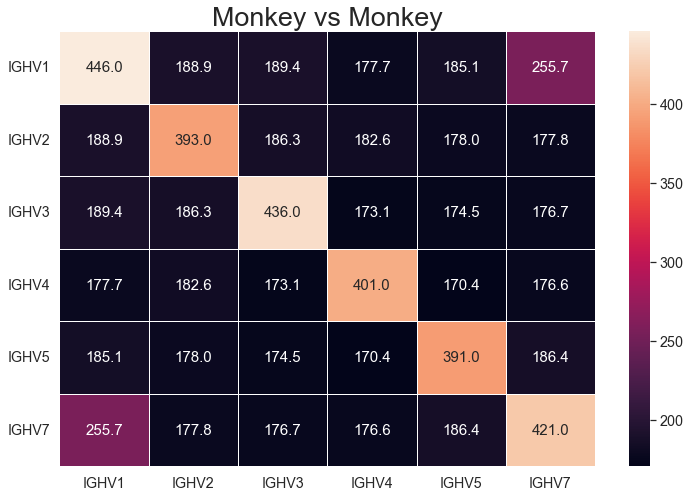

In [28]:
plt.figure(figsize = (12,8))
plt.title("Monkey vs Monkey", size ='xx-large')

# this is for axes
sns.set(font_scale=1.3)
# to show plot
ax = sns.heatmap(monk_array, xticklabels=maclabels, yticklabels=maclabels, annot=True, fmt=".1f", linewidths=.5, annot_kws={"fontsize":15})
# to pivot y axis
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)


Inter

In [29]:
align_inter = pairwise2.align.globalms(horseH1, monkeyH1,1,-1,-0.5,-0.1)
inter_array[0][0]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH1, monkeyH2,1,-1,-0.5,-0.1)
inter_array[0][1]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH1, monkeyH3,1,-1,-0.5,-0.1)
inter_array[0][2]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH1, monkeyH4,1,-1,-0.5,-0.1)
inter_array[0][3]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH1, monkeyH5,1,-1,-0.5,-0.1)
inter_array[0][4]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH1, monkeyH7,1,-1,-0.5,-0.1)
inter_array[0][5]=align_inter[0][2]


align_inter = pairwise2.align.globalms(horseH2, monkeyH1,1,-1,-0.5,-0.1)
inter_array[1][0]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH2, monkeyH2,1,-1,-0.5,-0.1)
inter_array[1][1]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH2, monkeyH3,1,-1,-0.5,-0.1)
inter_array[1][2]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH2, monkeyH4,1,-1,-0.5,-0.1)
inter_array[1][3]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH2, monkeyH5,1,-1,-0.5,-0.1)
inter_array[1][4]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH2, monkeyH7,1,-1,-0.5,-0.1)
inter_array[1][5]=align_inter[0][2]

align_inter = pairwise2.align.globalms(horseH3, monkeyH1,1,-1,-0.5,-0.1)
inter_array[2][0]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH3, monkeyH2,1,-1,-0.5,-0.1)
inter_array[2][1]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH3, monkeyH3,1,-1,-0.5,-0.1)
inter_array[2][2]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH3, monkeyH4,1,-1,-0.5,-0.1)
inter_array[2][3]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH3, monkeyH5,1,-1,-0.5,-0.1)
inter_array[2][4]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH3, monkeyH7,1,-1,-0.5,-0.1)
inter_array[2][5]=align_inter[0][2]

align_inter = pairwise2.align.globalms(horseH4, monkeyH1,1,-1,-0.5,-0.1)
inter_array[3][0]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH4, monkeyH2,1,-1,-0.5,-0.1)
inter_array[3][1]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH4, monkeyH3,1,-1,-0.5,-0.1)
inter_array[3][2]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH4, monkeyH4,1,-1,-0.5,-0.1)
inter_array[3][3]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH4, monkeyH5,1,-1,-0.5,-0.1)
inter_array[3][4]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH4, monkeyH7,1,-1,-0.5,-0.1)
inter_array[3][5]=align_inter[0][2]

align_inter = pairwise2.align.globalms(horseH5, monkeyH1,1,-1,-0.5,-0.1)
inter_array[4][0]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH5, monkeyH2,1,-1,-0.5,-0.1)
inter_array[4][1]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH5, monkeyH3,1,-1,-0.5,-0.1)
inter_array[4][2]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH5, monkeyH4,1,-1,-0.5,-0.1)
inter_array[4][3]=align_inter[0][2]
print(inter_array[4][3])
align_inter = pairwise2.align.globalms(horseH5, monkeyH5,1,-1,-0.5,-0.1)
inter_array[4][4]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH5, monkeyH7,1,-1,-0.5,-0.1)
inter_array[4][5]=align_inter[0][2]

align_inter = pairwise2.align.globalms(horseH7, monkeyH1,1,-1,-0.5,-0.1)
inter_array[5][0]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH7, monkeyH2,1,-1,-0.5,-0.1)
inter_array[5][1]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH7, monkeyH3,1,-1,-0.5,-0.1)
inter_array[5][2]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH7, monkeyH4,1,-1,-0.5,-0.1)
inter_array[5][3]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH7, monkeyH5,1,-1,-0.5,-0.1)
inter_array[5][4]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH7, monkeyH7,1,-1,-0.5,-0.1)
inter_array[5][5]=align_inter[0][2]

inter_array = np.around(inter_array, decimals=1)
print(inter_array)
inter_diag = np.diagonal(inter_array)


152.1000000000004
[[232.  165.3 158.2 161.7 157.5 211.3]
 [139.9 178.8 134.5 144.  146.2 139.2]
 [186.1 181.4 283.9 172.2 177.2 182.2]
 [187.1 186.8 189.7 191.6 175.4 180.4]
 [163.2 142.5 140.6 152.1 166.7 151.3]
 [254.3 186.4 189.7 189.2 193.4 253.2]]


Visualization

[Text(0, 0.5, 'IGHV1'),
 Text(0, 1.5, 'IGHV2'),
 Text(0, 2.5, 'IGHV3'),
 Text(0, 3.5, 'IGHV4'),
 Text(0, 4.5, 'IGHV5'),
 Text(0, 5.5, 'IGHV7')]

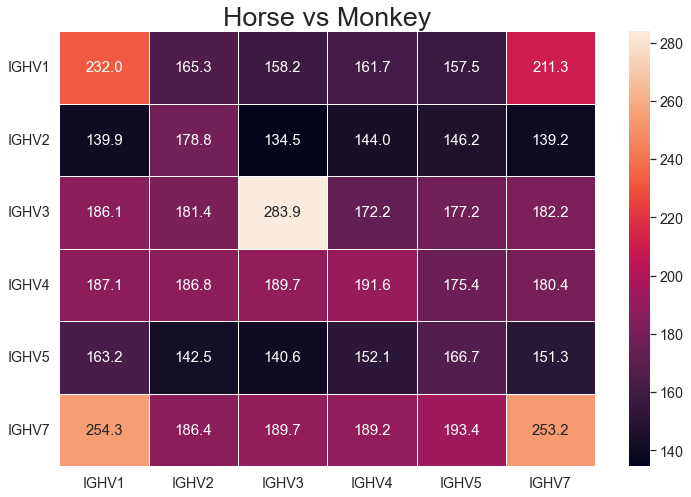

In [30]:
plt.figure(figsize = (12,8))
plt.title("Horse vs Monkey", size ='xx-large')

# this is for axes
sns.set(font_scale=1.3)
# to show plot
ax = sns.heatmap(inter_array, xticklabels=maclabels, yticklabels=equiplabels, annot=True, fmt=".1f", linewidths=.5, annot_kws={"fontsize":15})
# to pivot y axis
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)


INTRA horsey

In [31]:
align_inter = pairwise2.align.globalms(horseH1, horseH1,1,-1,-0.5,-0.1)
hors_array[0][0]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH1, horseH2,1,-1,-0.5,-0.1)
hors_array[0][1]=align_inter[0][2]
hors_array[1][0]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH1, horseH3,1,-1,-0.5,-0.1)
hors_array[0][2]=align_inter[0][2]
hors_array[2][0]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH1, horseH4,1,-1,-0.5,-0.1)
hors_array[0][3]=align_inter[0][2]
hors_array[3][0]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH1, horseH5,1,-1,-0.5,-0.1)
hors_array[0][4]=align_inter[0][2]
hors_array[4][0]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH1, horseH7,1,-1,-0.5,-0.1)
hors_array[0][5]=align_inter[0][2]
hors_array[5][0]=align_inter[0][2]

align_inter = pairwise2.align.globalms(horseH2, horseH2,1,-1,-0.5,-0.1)
hors_array[1][1]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH2, horseH3,1,-1,-0.5,-0.1)
hors_array[1][2]=align_inter[0][2]
hors_array[2][1]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH2, horseH4,1,-1,-0.5,-0.1)
hors_array[1][3]=align_inter[0][2]
hors_array[3][1]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH2, horseH5,1,-1,-0.5,-0.1)
hors_array[1][4]=align_inter[0][2]
hors_array[4][1]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH2, horseH7,1,-1,-0.5,-0.1)
hors_array[1][5]=align_inter[0][2]
hors_array[5][1]=align_inter[0][2]

align_inter = pairwise2.align.globalms(horseH3, horseH3,1,-1,-0.5,-0.1)
hors_array[2][2]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH3, horseH4,1,-1,-0.5,-0.1)
hors_array[2][3]=align_inter[0][2]
hors_array[3][2]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH3, horseH5,1,-1,-0.5,-0.1)
hors_array[2][4]=align_inter[0][2]
hors_array[4][2]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH3, horseH7,1,-1,-0.5,-0.1)
hors_array[2][5]=align_inter[0][2]
hors_array[5][2]=align_inter[0][2]

align_inter = pairwise2.align.globalms(horseH4, horseH4,1,-1,-0.5,-0.1)
hors_array[3][3]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH4, horseH5,1,-1,-0.5,-0.1)
hors_array[3][4]=align_inter[0][2]
hors_array[4][3]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH4, horseH7,1,-1,-0.5,-0.1)
hors_array[3][5]=align_inter[0][2]
hors_array[5][3]=align_inter[0][2]

align_inter = pairwise2.align.globalms(horseH5, horseH5,1,-1,-0.5,-0.1)
hors_array[4][4]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH5, horseH7,1,-1,-0.5,-0.1)
hors_array[4][5]=align_inter[0][2]
hors_array[5][4]=align_inter[0][2]

align_inter = pairwise2.align.globalms(horseH7, horseH7,1,-1,-0.5,-0.1)
hors_array[5][5]=align_inter[0][2]


monk_array = np.around(monk_array, decimals=1)
print(monk_array)
macaca_diag = np.diagonal(monk_array)

hors_array = np.around(hors_array, decimals=1)
print(hors_array)
horse_diag = np.diagonal(hors_array)

[[446.  188.9 189.4 177.7 185.1 255.7]
 [188.9 393.  186.3 182.6 178.  177.8]
 [189.4 186.3 436.  173.1 174.5 176.7]
 [177.7 182.6 173.1 401.  170.4 176.6]
 [185.1 178.  174.5 170.4 391.  186.4]
 [255.7 177.8 176.7 176.6 186.4 421. ]]
[[346.  132.7 159.3 157.1 144.4 250.7]
 [132.7 271.  140.8 140.6 120.7 141.4]
 [159.3 140.8 425.  189.6 146.5 183.2]
 [157.1 140.6 189.6 459.  153.5 199. ]
 [144.4 120.7 146.5 153.5 314.  157.1]
 [250.7 141.4 183.2 199.  157.1 475. ]]


Visualazation

[Text(0, 0.5, 'IGHV1'),
 Text(0, 1.5, 'IGHV2'),
 Text(0, 2.5, 'IGHV3'),
 Text(0, 3.5, 'IGHV4'),
 Text(0, 4.5, 'IGHV5'),
 Text(0, 5.5, 'IGHV7')]

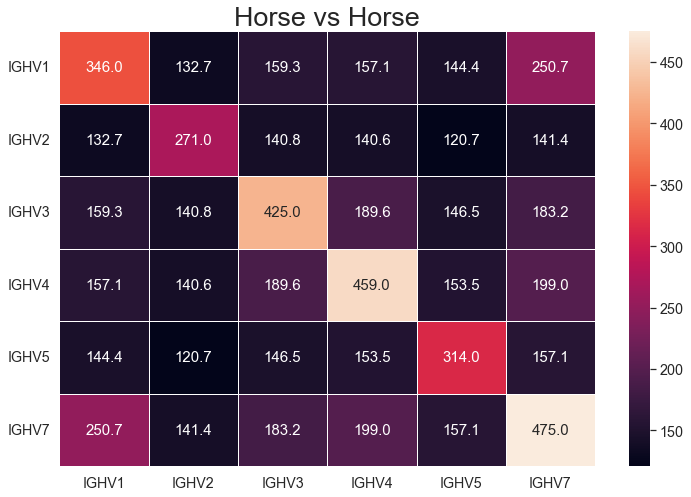

In [32]:
plt.figure(figsize = (12,8))
plt.title("Horse vs Horse", size ='xx-large')

# this is for axes
sns.set(font_scale=1.3)
# to show plot
ax = sns.heatmap(hors_array, xticklabels=equiplabels, yticklabels=equiplabels, annot=True, fmt=".1f", linewidths=.5, annot_kws={"fontsize":15})
# to pivot y axis
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)


Relative horsey

[-0.006 -0.02  -0.038 -0.035 -0.018 -0.034]
-0.025


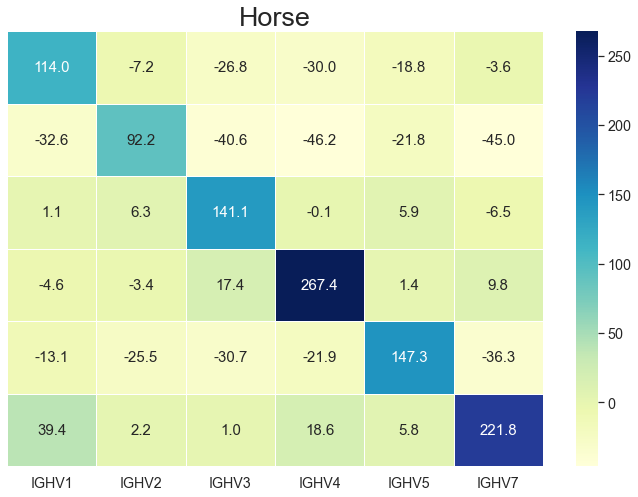

In [33]:
horsey = hors_array-inter_array.T
horsey = np.around(horsey, decimals=1)

plt.figure(figsize = (12,8))
plt.title("Horse", size ='xx-large')

# this is for axes
sns.set(font_scale=1.3)
# to show plot
ax = sns.heatmap(horsey, xticklabels=equiplabels, yticklabels=False, annot=True, fmt=".1f", linewidths=.5, annot_kws={"fontsize":15}, cmap="YlGnBu")
# to pivot y axis
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)


# Normalize and draw conclusions
exper1 = np.sum(horsey, axis=0)
diag = np.diagonal(horsey)
exper1 = exper1 - diag
exper1 = np.around(exper1/horse_diag, decimals=3)
exper1_mean = np.around(exper1/5, decimals=3)
print(exper1_mean)
exper1_all=np.sum(exper1_mean)
print(np.around(exper1_all/6, decimals=3))

Relative macaca

[0.03  0.026 0.04  0.031 0.023 0.052]
0.034


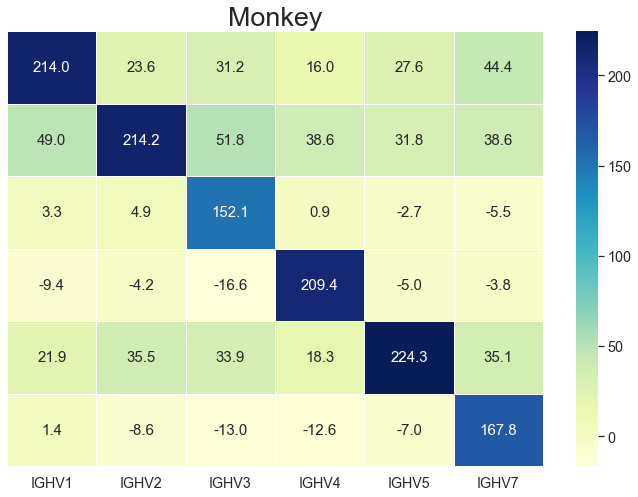

In [34]:
macaca = monk_array-inter_array
macaca = np.around(macaca, decimals=1)

plt.figure(figsize = (12,8))
plt.title("Monkey", size ='xx-large')

# this is for axes
sns.set(font_scale=1.3)
# to show plot
ax = sns.heatmap(macaca, xticklabels=maclabels, yticklabels=False, annot=True, fmt=".1f", linewidths=.5, annot_kws={"fontsize":15}, cmap="YlGnBu")
# to pivot y axis
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)

# Normalize and draw conclusions
exper2 = np.sum(macaca, axis=0)
diag = np.diagonal(macaca)
exper2 = exper2 - diag
exper2 = np.around(exper2/macaca_diag, decimals=3)
exper2_mean = np.around(exper2/5, decimals=3)
print(exper2_mean)
exper2_all=np.sum(exper2_mean)
print(np.around(exper2_all/6, decimals=3))

In [38]:

horizontal_m = (inter_diag-(np.sum(monk_array,axis=0)-macaca_diag)/5)/macaca_diag
horizontal_m =np.around(horizontal_m, decimals=4)
print(horizontal_m) 
print(np.sum(horizontal_m)/6)

[1442.8 1306.6 1336.  1281.4 1285.4 1394.2]
[996.8 913.6 900.  880.4 894.4 973.2]
[ 0.0732 -0.01    0.2383  0.0387 -0.0312  0.1391]
0.07468333333333334


In [39]:
horizontal_h = (inter_diag-(np.sum(hors_array,axis=0)-horse_diag)/5)/horse_diag
horizontal_h =np.around(horizontal_h, decimals=4)
print(horizontal_h) 
print(np.sum(horizontal_h)/6)

[0.1825 0.1607 0.2824 0.0515 0.0709 0.1409]
0.14814999999999998


In [42]:
stat,p = stats.kstest(exper1_mean, exper2_mean)
print(p)

0.0021645021645021645
